#                                           Introduction
The data set which we are dealing is the bank data set. The basic aim or objective while dealing this data set is that we have 
to find the customers or clients who are subscribing to the term deposit which is our target variable.. We have various type of information available about the customers like there age,education qualification,Marital status and many more.By using this
customer information bank can easily target there clients means by which type of customer there is a chance of more profitability or which type of customers will subscribe to term deposit more.We have also the outcome of previous market
campaign which make our study little bit easier. 


In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# reading the file and getting the first five rows
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# reading the last five rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
# chancing the column name y to deposit as it is a target variable
df=df.rename(columns={'y':'deposit'})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,nonexistent,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,nonexistent,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,nonexistent,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,999,0,nonexistent,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,999,0,nonexistent,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,999,0,nonexistent,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,999,0,nonexistent,no


In [ ]:
# Replacing -1 to 999 as -1 value is not passible and it is given in the data set that 999 means according to data that person has not contacted.
df['pdays'] =df['pdays'].replace([-1],999)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,999,0,nonexistent,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,999,0,nonexistent,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,999,0,nonexistent,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,999,0,nonexistent,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,999,0,nonexistent,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,999,0,nonexistent,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,999,0,nonexistent,no


In [ ]:
# poutcome means the outcome of previous campaign we are replacing it values because if the outcome is unknown and other it means it does not exist for us.  
df['poutcome'] =df['poutcome'].replace(['unknown','other'],'nonexistent')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,nonexistent,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,nonexistent,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,nonexistent,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,nonexistent,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,nonexistent,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,nonexistent,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,nonexistent,no


In [ ]:
# Replacing unkmown with mode because there is only two type of communication present in our data set which is cellular and telephonic.
df['contact'] =df['contact'].replace(['unknown'],df.contact.mode())
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,999,0,nonexistent,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,999,0,nonexistent,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,999,0,nonexistent,no
3,47,blue-collar,married,unknown,no,1506,yes,no,cellular,5,may,92,1,999,0,nonexistent,no
4,33,unknown,single,unknown,no,1,no,no,cellular,5,may,198,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,999,0,nonexistent,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,999,0,nonexistent,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,999,0,nonexistent,no


In [ ]:
# finding total number of rows and columns.
df.shape

(45211, 17)

In [ ]:
#getting information about dataset that how many total values are there and in which column we have null values and about the datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# finding if there any null value is present or not. 
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [ ]:
# getting information about mean,median,quartiles of the specific columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,857.565283,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,303.245691,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,999.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,999.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,999.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,999.000000,275.000000


Text(0.5, 1.0, 'Education')

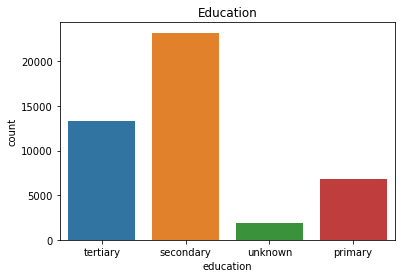

In [ ]:
sns.countplot(x='education',data=df)
plt.title('Education')


In [ ]:
# Most of the client which we are targeting has done secondary education even we have good number of clients from tertiary education as well.

Text(0.5, 1.0, 'Default')

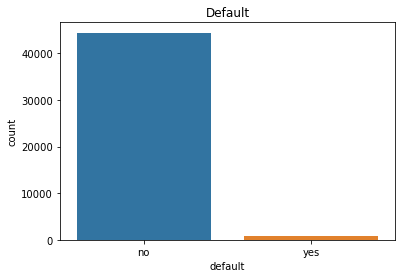

In [ ]:
sns.countplot(x='default',data=df)
plt.title('Default')

In [ ]:
# Most of the clients which we are targeting are non defaulter.

Text(0.5, 1.0, 'Month count')

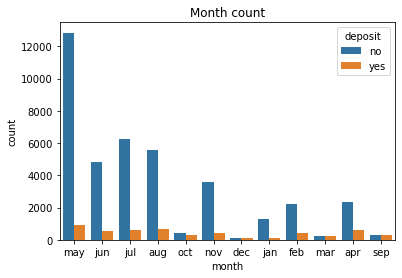

In [ ]:
sns.countplot(x='month',hue='deposit',data=df)
plt.title("Month count")

In [ ]:
#Most of the clients are subscribing to deposit in the month of may.

Text(0.5, 1.0, 'Jobs')

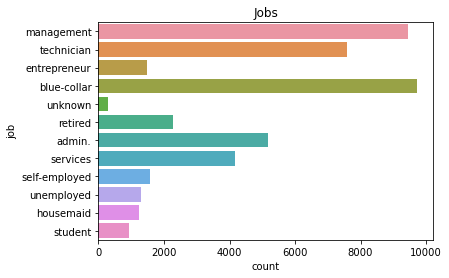

In [ ]:
sns.countplot(y='job',data=df)
plt.title('Jobs')

In [ ]:
# Most of the clients have blue collar job and we can interpret with the graph that person with management and technician jobs are good clients on the other hand student,housemaid,unemployed we have less number of clients from it.  

Text(0.5, 1.0, 'Box plot between age and education with deposit as legend')

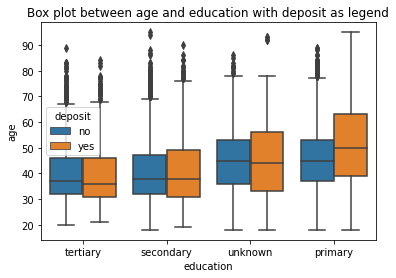

In [ ]:
sns.boxplot(x='education',y='age',hue='deposit',data=df)
plt.title('Box plot between age and education with deposit as legend')


In [ ]:
# we can interpret from the graph that most of the clients with primary education has subscribed to deposit more where as in the case of tertiary education very less number has subscibed to deposit. 

Text(0.5, 1.0, 'Bar plot between job and age with deposit as legend')

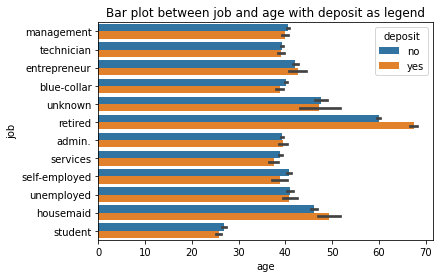

In [ ]:
sns.barplot(y='job',x='age',hue='deposit',data=df)
plt.title('Bar plot between job and age with deposit as legend')

In [ ]:
# We can clearly see from the graph that students are young in age,while working professionals are adults and the retired persons are old in age.We can also interpret from this graph that most of the retired persons and house maid are subscribed to deposit. 

Text(0.5, 1.0, 'Marital status')

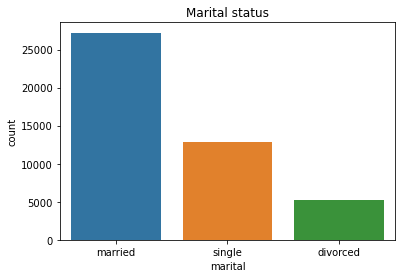

In [ ]:
sns.countplot(x='marital',data=df)
plt.title('Marital status')

In [ ]:
# Most of the clients are married and we have very less number of clients who are married or widowed.

Text(0.5, 1.0, 'Graph between marital status and age with deposit as legend ')

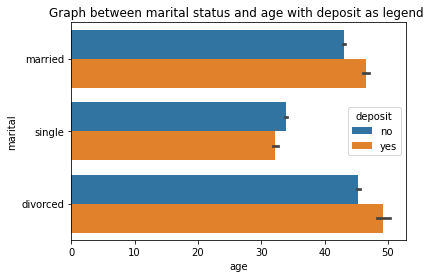

In [ ]:
sns.barplot(x='age',y='marital',hue='deposit',data=df)
plt.title('Graph between marital status and age with deposit as legend ')

In [ ]:
#We can interpret from this graph that widows women or divorced women having more age have subscribed to deposit,and we can even see married women with higher age has also subscibed to deposit.Where as in the case of single age is less and most of the person with single age does not subscribe to deposit.

Text(0.5, 1.0, 'Housing Loan')

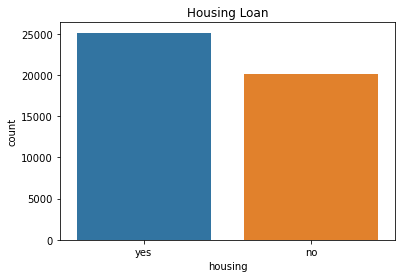

In [ ]:
sns.countplot(x='housing',data=df)
plt.title("Housing Loan")

In [ ]:
# Most of the clients has taken housing loan.

Text(0.5, 1.0, 'Personal loan')

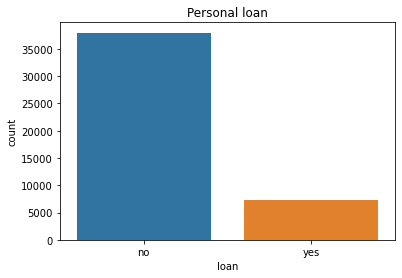

In [ ]:
sns.countplot(x='loan',data=df)
plt.title("Personal loan")

In [ ]:
# Most of the clients did not take any kind of personal loan.

Text(0.5, 1.0, 'Box plot between housing and age with deposit as legend')

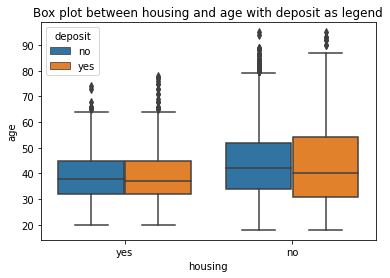

In [ ]:
sns.boxplot(x='housing',y='age',hue='deposit',data=df)
plt.title('Box plot between housing and age with deposit as legend')

In [ ]:
# We can see from the graph that client with no house loan has subscibed to deposit at higher age  where as client having house loan has subcribed to deposit in smaller age in comparison to no loan person.

Text(0.5, 1.0, 'Box plot between age and loan')

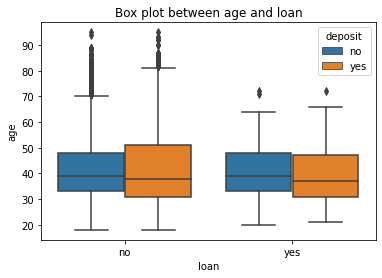

In [ ]:
sns.boxplot(y='age',x='loan',hue='deposit',data=df)
plt.title('Box plot between age and loan')

In [ ]:
# Client with no loan have subscribed to deposit at higher age in comparison to client having loan because they subscribed to term deposit at lower age.

Text(0.5, 1.0, 'contact info')

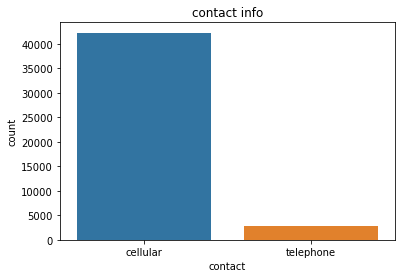

In [ ]:
sns.countplot(x="contact",data=df)
plt.title("contact info")

In [ ]:
# Most of the clients are using Cellular Phone.

Text(0.5, 1.0, 'box blot between contact and age with deposit as legend')

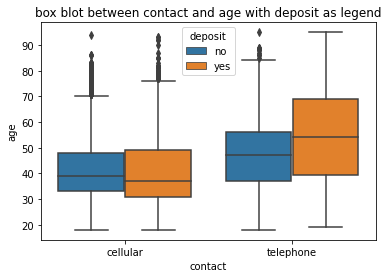

In [ ]:
sns.boxplot(x='contact',y='age',hue='deposit',data=df)
plt.title('box blot between contact and age with deposit as legend')

In [ ]:
# As the age is increasing most of the clients are using telephone and the person who are using telephone have subscribed to term deposit more.

Text(0.5, 1.0, 'scatter plot b/w age and balance')

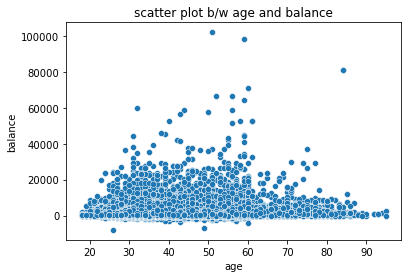

In [ ]:
sns.scatterplot(x='age',y='balance',data=df)
plt.title('scatter plot b/w age and balance')

In [ ]:
#We can interpret from this graph that maximum balance are available between the clients who are between the age group 40 to 60 and we can also see people with age group 80-90 has also sufficient balance. 

# Dealing With Outliers

<AxesSubplot:xlabel='age'>

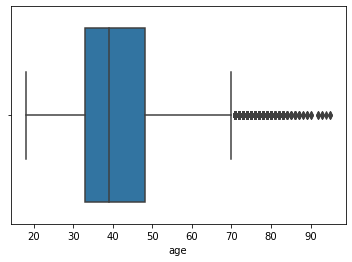

In [ ]:
sns.boxplot(x='age',data=df)

In [ ]:
#Finding the Quartile range(Q1) for our data as we need it in removing the outliers during IQR process.
Q1=df.quantile(0.25)
Q1

age          33.0
balance      72.0
day           8.0
duration    103.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64

In [ ]:
#Similarly finding the Quartile range(Q3) for our data as we need it in removing the outliers during IQR process
Q3=df.quantile(0.75)
Q3

age           48.0
balance     1428.0
day           21.0
duration     319.0
campaign       3.0
pdays         -1.0
previous       0.0
Name: 0.75, dtype: float64

In [ ]:
#Finding Inter Quartile Range
from scipy import stats
IQR= stats.iqr(df.age,interpolation='midpoint')

print(IQR)

15.0


In [ ]:
#Finding Upper Limit And lower limit range for the age data.
lower_limit=33-(1.5*15)
upper_limit=48+(1.5*15)

In [ ]:
#This is the range between which our data lies after removing the outliers.
(lower_limit,upper_limit)

(10.5, 70.5)

<AxesSubplot:xlabel='balance'>

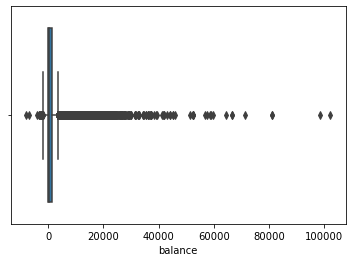

In [ ]:
sns.boxplot(x='balance',data=df)

In [ ]:
#Finding Inter Quartile Range
from scipy import stats
IQR= stats.iqr(df.balance,interpolation='midpoint')

print(IQR)

1356.0


In [ ]:
#Finding Upper Limit And lower limit range for the age data.
lower_limit=72-(1.5*1356)
upper_limit=1428+(1.5*1356)

In [ ]:
#This is the range between which our data lies after removing the outliers.
(lower_limit,upper_limit)

(-1962.0, 3462.0)

<AxesSubplot:>

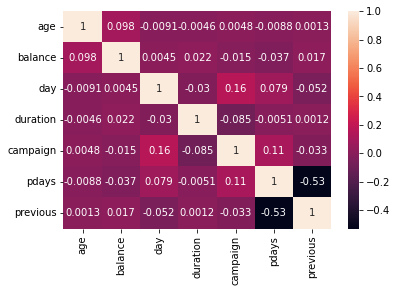

In [ ]:
# We have no such high correlation. 
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)

In [ ]:
import pymysql
import pandas as pd

conn=pymysql.connect(host='localhost',user='root',passwd='Rohan@123',db='bank_test')

df=pd.read_sql_query("select * from bank_full",conn)

print(df)

C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [ ]:
df=pd.read_sql_query("SELECT age, COUNT(*) AS count, SUM(balance) AS total_balance FROM bank_full WHERE loan = 'yes' OR housing = 'yes' GROUP BY age ORDER BY count DESC LIMIT 1",conn)
print(df)

C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   age  count  total_balance
0   32   1422      1602277.0


In [ ]:
df=pd.read_sql_query("SELECT age, job as department, MAX(balance) AS highest_balance FROM bank_full GROUP BY age ORDER BY age",conn)
print(df)

    age   department  highest_balance
0    18      student             1944
1    19      student             5368
2    20  blue-collar             8860
3    21      student             8278
4    22  blue-collar            10971
..  ...          ...              ...
72   90      retired              712
73   92      retired              775
74   93      retired              775
75   94      retired             1234
76   95      retired             2282

[77 rows x 3 columns]


C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [ ]:
df=pd.read_sql_query("SELECT education, (balance * (15 / 100)) AS interest FROM bank_full WHERE duration > 150 AND marital = 'married' AND education = 'secondary';",conn)
print(df)

C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


      education  interest
0     secondary      0.90
1     secondary     24.30
2     secondary    108.45
3     secondary      7.50
4     secondary    -55.80
...         ...       ...
8150  secondary     83.55
8151  secondary    427.50
8152  secondary    857.25
8153  secondary    100.20
8154  secondary    445.65

[8155 rows x 2 columns]


In [ ]:
df=pd.read_sql_query("SELECT age, COUNT(*) AS count, job AS profession FROM bank_full WHERE loan = 'yes' OR housing = 'yes' GROUP BY profession ORDER BY count DESC LIMIT 1",conn)
print(df)

C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   age  count   profession
0   47   7599  blue-collar


In [ ]:
df=pd.read_sql_query("SELECT month, SUM(balance) AS total_balance FROM bank_full GROUP BY month ORDER BY total_balance DESC LIMIT 1",conn)
print(df)

C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


  month  total_balance
0   may     14247708.0


In [ ]:
df=pd.read_sql_query("select month, SUM(balance + fine) as amount from temp group by month;",conn)
print(df)

C:\Users\admin\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


   month    amount
0    may -22663.05
1    jun  -5309.55
2    jul -11212.50
3    aug  -3455.75
4    oct   -151.80
5    nov  -2057.35
6    jan  -2036.65
7    feb  -2461.00
8    mar   -259.90
9    apr  -2114.85
10   dec    -52.90
11   sep    -52.90


#                                              CONCLUSION
After doing our study and analysis we can came across various canclusions which include:
    1: Most of the clients has done Secondary education which we can target.
    2: Most of the clients are into Management level job.
    3: The term deposit is subscribed by retired person more.
    4: Most of the clients are using cellular phone.
    5: The divorced or widowed women have also subscribed to term deposit in great number.
    6: The maximum Subscribers we are getting in the month of may.